In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For encoding and preprocessing later
from sklearn.preprocessing import LabelEncoder

# For feature selection later
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [61]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [62]:
df = pd.read_csv(r"E:\Spectrum\Project 8\Dataset\Personal_Loan_Dataset.csv")
df.head()

,ID,Age,Education,Experience,Income,ZIP Code,Married,Dependents,Credit_Card,Num_Credit_Card,Monthly_CC_Usage,Credit_Score,Self_Employed,Salaried,Loan_Amount,Nationality,Personal_Loan,Securities_Account,CD_Account,Online_Banking,Last_Two_Years_Tax_Return_Filled,Living_Property,Property_Area,Loan_Status,Unnamed: 24
0,1,25,1,1,49000,486113,0,4,0,4,16000,Good,Yes,No,100000,Indian,0,1,0,0,Yes,Rented,Urban,Approved,NaN
1,2,45,1,19,34000,464112,0,3,0,4,15000,Good,No,Yes,100000,Indian,0,1,0,0,No,Owned,Semi Urban,Reject,NaN
2,3,39,1,15,11000,475001,0,1,0,4,10000,Good,Yes,No,50000,Indian,0,0,0,0,Yes,Rented,Rural,Reject,NaN
3,4,35,2,9,100000,462030,0,1,0,4,27000,Good,No,Yes,1000000,Indian,0,0,0,0,Yes,Owned,Urban,Approved,NaN
4,5,35,2,8,45000,456222,1,4,1,4,10000,Good,Yes,No,100000,Indian,0,0,0,0,Yes,Owned,Urban,Approved,NaN


In [63]:
# Shape and columns
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())

Shape of dataset: (5000, 25)

Column names: ['ID', 'Age', 'Education', 'Experience', 'Income', 'ZIP Code', 'Married', 'Dependents', 'Credit_Card', 'Num_Credit_Card', 'Monthly_CC_Usage', 'Credit_Score', 'Self_Employed', 'Salaried', 'Loan_Amount', 'Nationality', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online_Banking', 'Last_Two_Years_Tax_Return_Filled', 'Living_Property', 'Property_Area', 'Loan_Status', 'Unnamed: 24']


In [64]:
# Data types and non-null counts
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ID                                5000 non-null   int64 
 1   Age                               5000 non-null   int64 
 2   Education                         5000 non-null   int64 
 3   Experience                        5000 non-null   int64 
 4   Income                            5000 non-null   int64 
 5   ZIP Code                          5000 non-null   object
 6   Married                           5000 non-null   int64 
 7   Dependents                        5000 non-null   int64 
 8   Credit_Card                       5000 non-null   int64 
 9   Num_Credit_Card                   5000 non-null   int64 
 10  Monthly_CC_Usage                  5000 non-null   int64 
 11  Credit_Score                      5000 non-null   object
 12

In [65]:
# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
ID                                     0
Age                                    0
Education                              0
Experience                             0
Income                                 0
ZIP Code                               0
Married                                0
Dependents                             0
Credit_Card                            0
Num_Credit_Card                        0
Monthly_CC_Usage                       0
Credit_Score                           0
Self_Employed                          0
Salaried                               1
Loan_Amount                            0
Nationality                            0
Personal_Loan                          0
Securities_Account                     0
CD_Account                             0
Online_Banking                         0
Last_Two_Years_Tax_Return_Filled       0
Living_Property                        0
Property_Area                          0
Loan_Status                      

In [66]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [67]:
# Quick look at categorical columns unique values
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", cat_cols.tolist())

for col in cat_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Categorical Columns: ['ZIP Code', 'Credit_Score', 'Self_Employed', 'Salaried', 'Nationality', 'Last_Two_Years_Tax_Return_Filled', 'Living_Property', 'Property_Area', 'Loan_Status', 'Unnamed: 24']

Unique values in ZIP Code: ['486113' '464112' '475001' '462030' '456222' '456771' '483773' '475002'
 '462016' '455115' '462003' '462021' '462008' '462001' '462023' '462031'
 '462036' '462015' '462018' '462024' '462007' '462032' '462012' '462013'
 '462004' '462026' '462010' '462011' '462006' '462002' '480111' '483775'
 '456331' '486226' '480110' '480447' '480115' '480116' '480001' '480002'
 '474001' '453652' '474005' '480443' '486341' '486333' '456450' '480553'
 '480449' '453235' '464221' '486115' '453220' '456550' '483222' '464220'
 '474040' '474042' '474055' '474004' '474003' '474008' '474009' '474020'
 '474006' '474010' '474007' '474002' '464331' '480224' '453463' '452056'
 '452001' '452006' '452005' '452002' '452020' '452012' '452008' '452009'
 '452004' '482006' '482010' '482051' '483220'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13896\3312745919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='viridis')


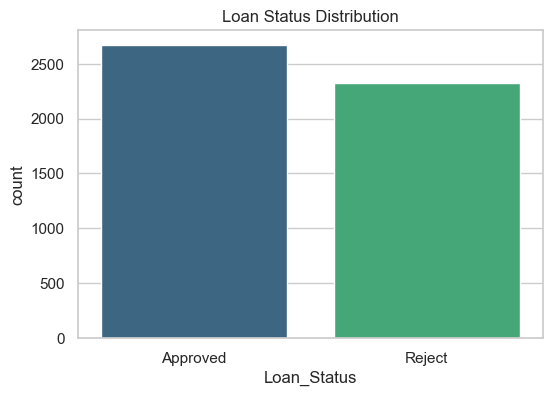

In [68]:
# Step 3: Target Variable Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title('Loan Status Distribution')
plt.show()

In [69]:
# Print actual counts and percentages
loan_status_counts = df['Loan_Status'].value_counts()
loan_status_percent = df['Loan_Status'].value_counts(normalize=True) * 100
print("Loan Status Counts:\n", loan_status_counts)
print("\nLoan Status Percentage:\n", loan_status_percent)

Loan Status Counts:
 Loan_Status
Approved    2674
Reject      2326
Name: count, dtype: int64

Loan Status Percentage:
 Loan_Status
Approved    53.48
Reject      46.52
Name: proportion, dtype: float64


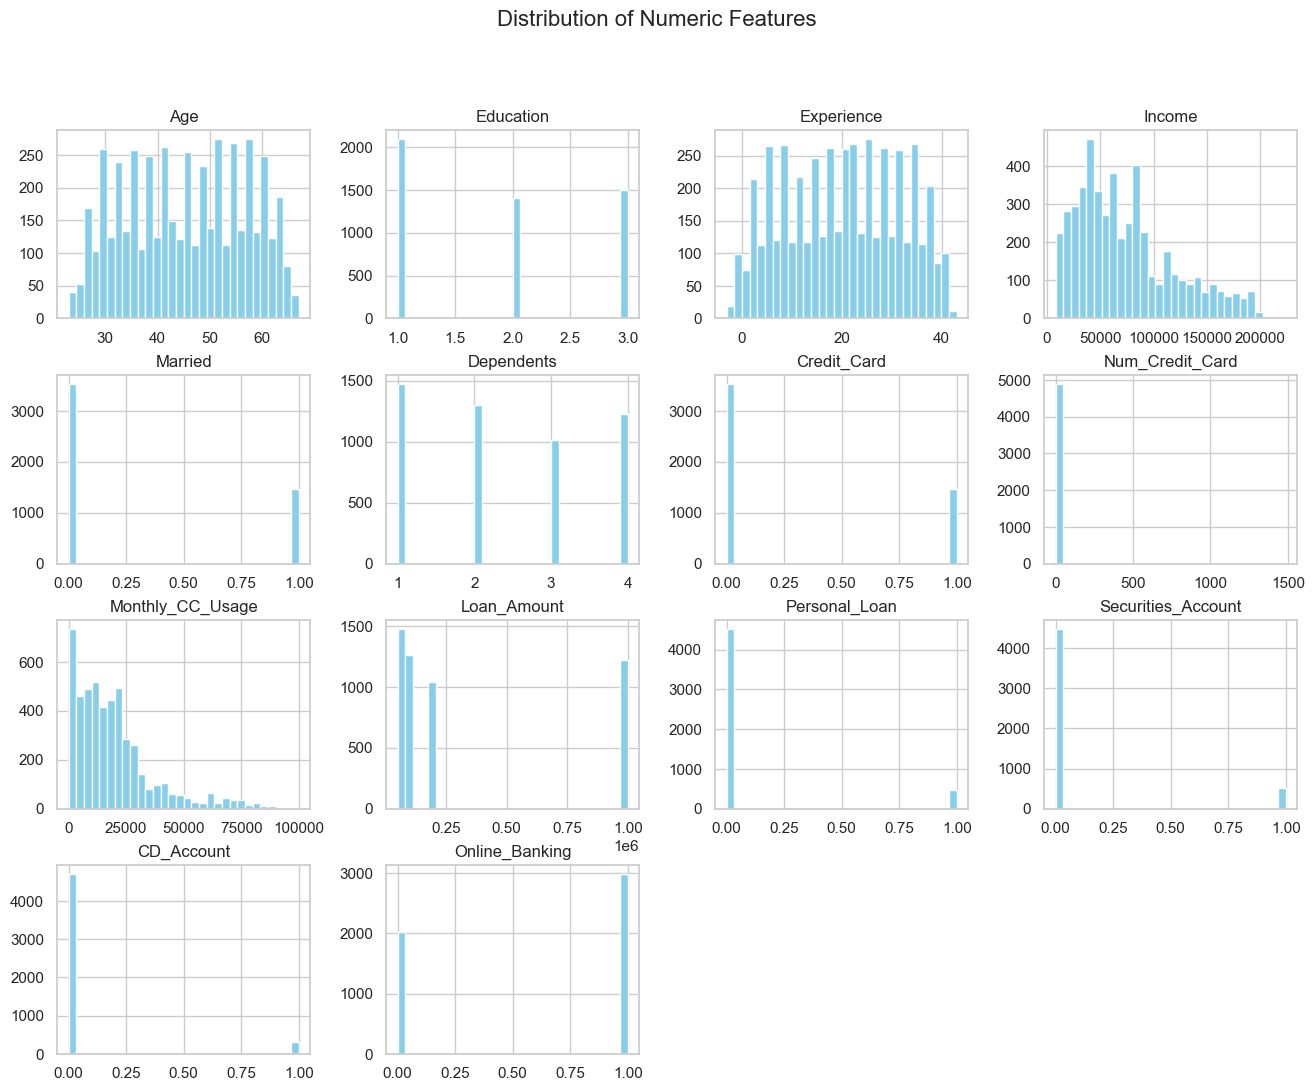

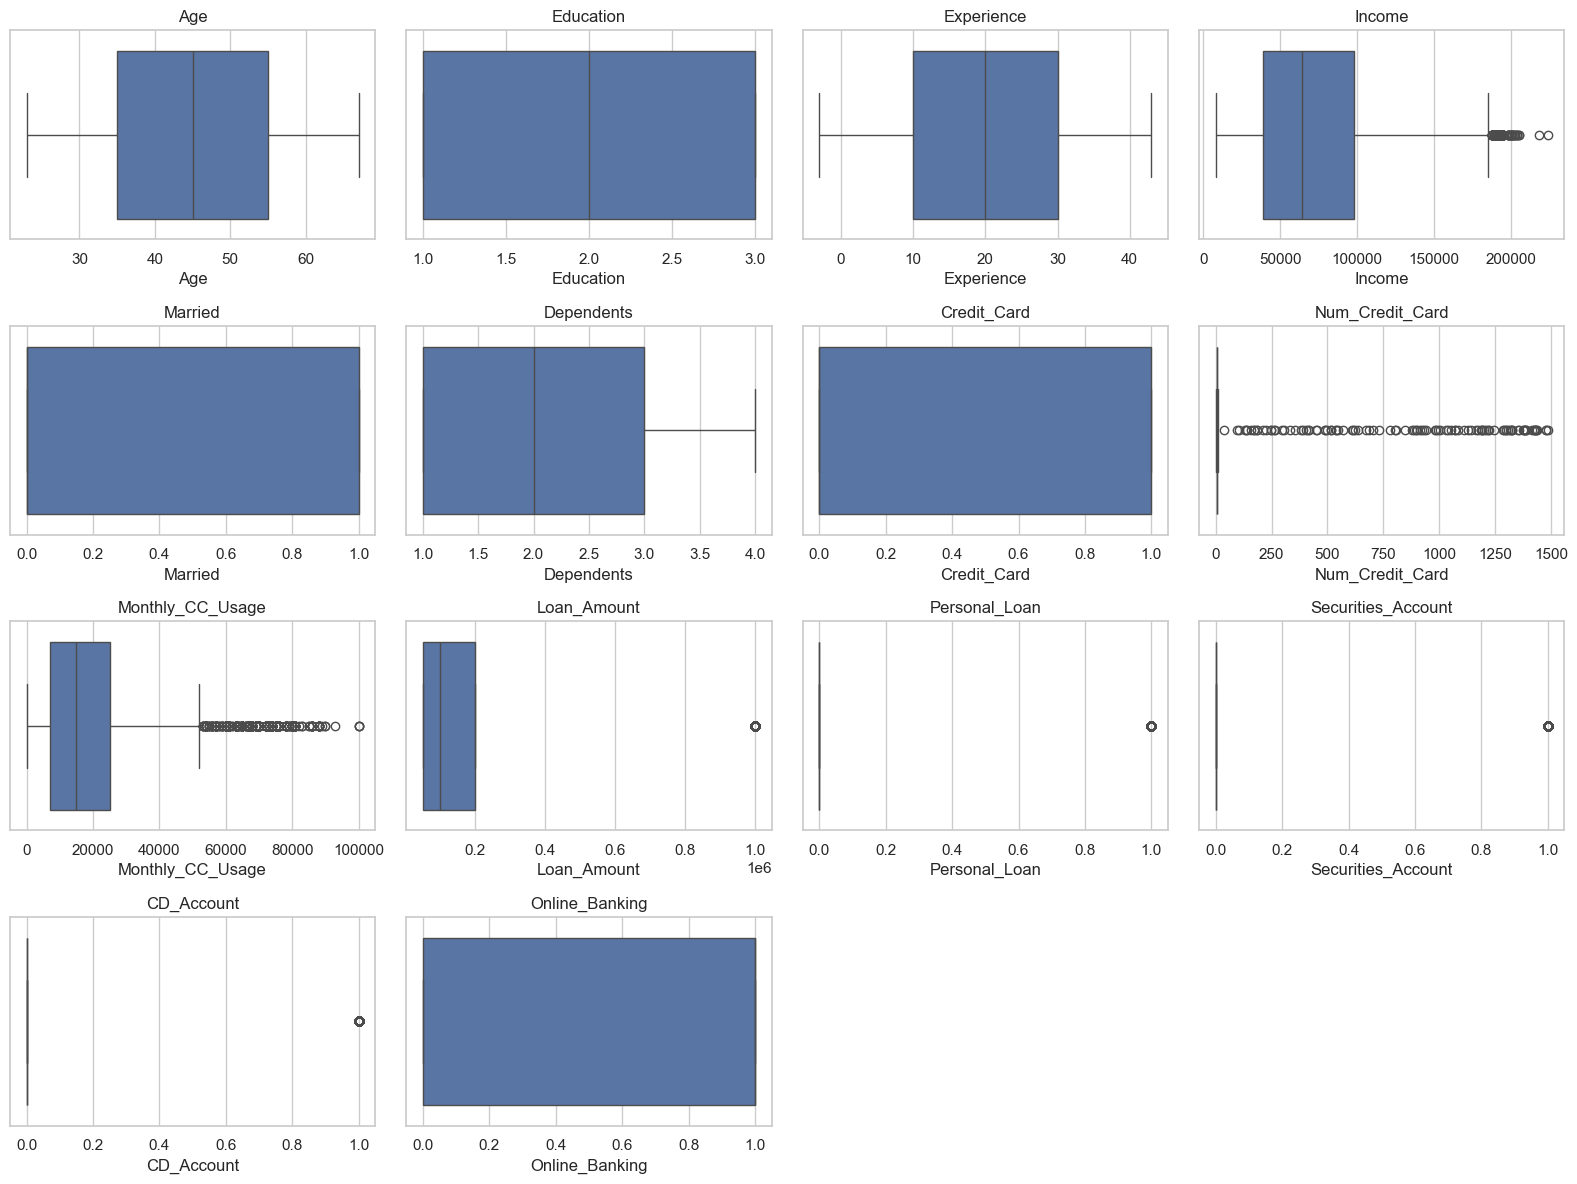

In [70]:
# Step 4: Numeric Features Distribution and Outlier Check
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['ID']]  # Exclude ID

# Plot histograms
df[numeric_cols].hist(figsize=(16, 12), bins=30, color='skyblue')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [71]:
# Step 5: Outlier Handling

# List of columns to cap
cols_to_cap = ['Income', 'Monthly_CC_Usage', 'Loan_Amount', 'Num_Credit_Card']

for col in cols_to_cap:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

# Fix negative Experience values
median_experience = df['Experience'][df['Experience'] >= 0].median()
df['Experience'] = np.where(df['Experience'] < 0, median_experience, df['Experience'])

print("Outlier treatment done. New max values:")
print(df[cols_to_cap].max())


Outlier treatment done. New max values:
Income               193000.00
Monthly_CC_Usage      80000.00
Loan_Amount         1000000.00
Num_Credit_Card         943.37
dtype: float64


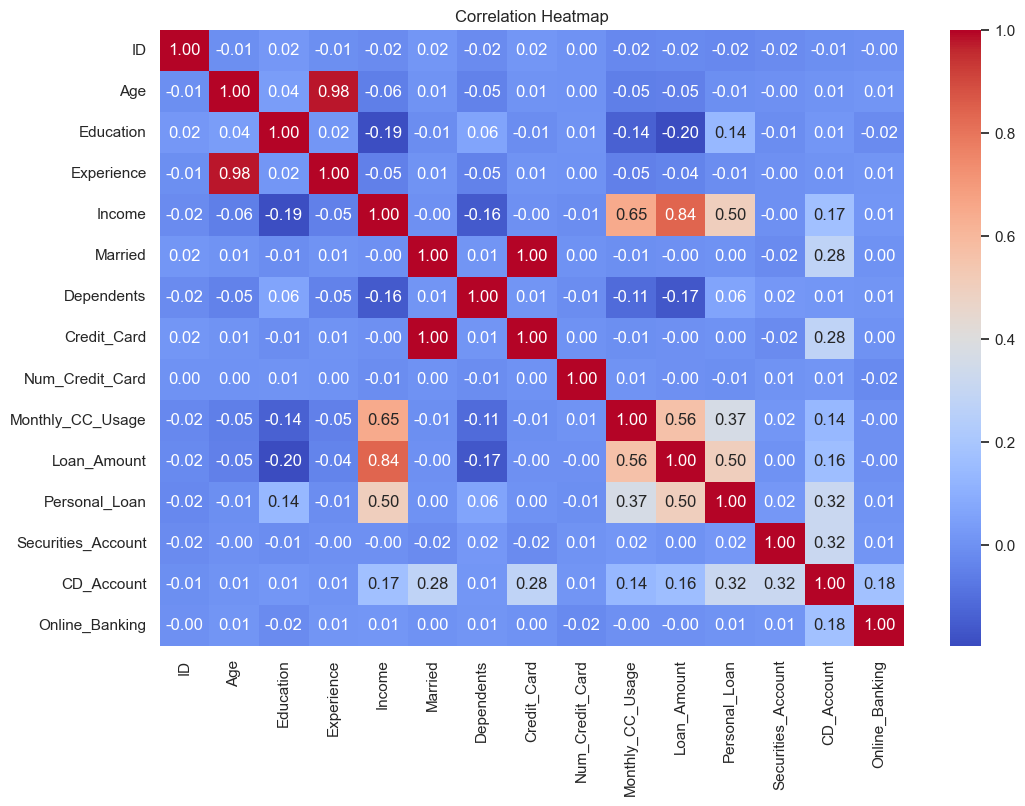


Top correlations with Personal_Loan:
Personal_Loan         1.000000
Income                0.503945
Loan_Amount           0.500890
Monthly_CC_Usage      0.366785
CD_Account            0.316355
Education             0.136722
Dependents            0.061367
Securities_Account    0.021954
Online_Banking        0.006278
Credit_Card           0.002802
Married               0.002802
Num_Credit_Card      -0.007489
Age                  -0.007726
Experience           -0.014013
ID                   -0.024801
Name: Personal_Loan, dtype: float64


In [72]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Check top correlations with Personal_Loan (since Loan_Status is categorical)
print("\nTop correlations with Personal_Loan:")
print(corr['Personal_Loan'].sort_values(ascending=False))


In [73]:
# Step 7: Data Cleaning

# Drop irrelevant columns
df.drop(['ID', 'Unnamed: 24', 'Nationality', 'ZIP Code', 'Experience'], axis=1, inplace=True)

# Fix missing Salaried value -> replace with 'No'
df['Salaried'] = df['Salaried'].fillna('No')

# Strip spaces in categorical columns
cat_cols = ['Self_Employed', 'Salaried', 'Last_Two_Years_Tax_Return_Filled']
for col in cat_cols:
    df[col] = df[col].str.strip()

# Encode target variable
df['Loan_Status'] = df['Loan_Status'].map({'Approved': 1, 'Reject': 0})

# Quick check
print("Remaining columns:", df.columns)
print("\nMissing values after cleaning:\n", df.isnull().sum())

Remaining columns: Index(['Age', 'Education', 'Income', 'Married', 'Dependents', 'Credit_Card',
       'Num_Credit_Card', 'Monthly_CC_Usage', 'Credit_Score', 'Self_Employed',
       'Salaried', 'Loan_Amount', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online_Banking', 'Last_Two_Years_Tax_Return_Filled',
       'Living_Property', 'Property_Area', 'Loan_Status'],
      dtype='object')

Missing values after cleaning:
 Age                                 0
Education                           0
Income                              0
Married                             0
Dependents                          0
Credit_Card                         0
Num_Credit_Card                     0
Monthly_CC_Usage                    0
Credit_Score                        0
Self_Employed                       0
Salaried                            0
Loan_Amount                         0
Personal_Loan                       0
Securities_Account                  0
CD_Account                     

In [74]:
# Step 8: Encode Categorical Features using One-Hot Encoding
categorical_cols = ['Credit_Score', 'Self_Employed', 'Salaried', 
                    'Last_Two_Years_Tax_Return_Filled', 'Living_Property', 'Property_Area']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df.shape)
print("Columns after encoding:\n", df.columns.tolist())


Shape after encoding: (5000, 22)
Columns after encoding:
 ['Age', 'Education', 'Income', 'Married', 'Dependents', 'Credit_Card', 'Num_Credit_Card', 'Monthly_CC_Usage', 'Loan_Amount', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online_Banking', 'Loan_Status', 'Credit_Score_Poor', 'Credit_Score_Standard', 'Self_Employed_Yes', 'Salaried_Yes', 'Last_Two_Years_Tax_Return_Filled_Yes', 'Living_Property_Rented', 'Property_Area_Semi Urban', 'Property_Area_Urban']


In [75]:
# Step 9: Split Data into Features and Target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (4000, 21)
Test shape: (1000, 21)


In [76]:
#Feature Selection with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model for RFE
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# RFE with 10 features
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_features.tolist())


Selected Features by RFE:
 ['Education', 'Dependents', 'Personal_Loan', 'Securities_Account', 'Credit_Score_Poor', 'Credit_Score_Standard', 'Salaried_Yes', 'Last_Two_Years_Tax_Return_Filled_Yes', 'Property_Area_Semi Urban', 'Property_Area_Urban']


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
# STEP 1: Ensure correct split using selected features only
selected_features = ['Education', 'Dependents', 'Personal_Loan', 'Securities_Account',
                     'Credit_Score_Poor', 'Credit_Score_Standard', 'Salaried_Yes',
                     'Last_Two_Years_Tax_Return_Filled_Yes', 'Property_Area_Semi Urban',
                     'Property_Area_Urban']

# Create X and y
X_lr = df[selected_features]
y_lr = df['Loan_Status']

# Split again to avoid contamination
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

# Validate sizes
print("Train:", X_train_lr_scaled.shape, "Test:", X_test_lr_scaled.shape)



Train: (4000, 10) Test: (1000, 10)


In [79]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_lr_scaled, y_train_lr)

# Predict on TEST set only
y_pred_lr = log_reg.predict(X_test_lr_scaled)
y_prob_lr = log_reg.predict_proba(X_test_lr_scaled)[:, 1]

print("Lengths:", len(y_test_lr), len(y_pred_lr), len(y_prob_lr))


Lengths: 1000 1000 1000


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test_lr, y_pred_lr),
    'Precision': precision_score(y_test_lr, y_pred_lr),
    'Recall': recall_score(y_test_lr, y_pred_lr),
    'F1-score': f1_score(y_test_lr, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test_lr, y_prob_lr)
}

print(lr_metrics)


{'Model': 'Logistic Regression', 'Accuracy': 0.934, 'Precision': 0.8901830282861897, 'Recall': 1.0, 'F1-score': 0.9419014084507042, 'ROC-AUC': np.float64(0.9521053160486382)}


In [81]:
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

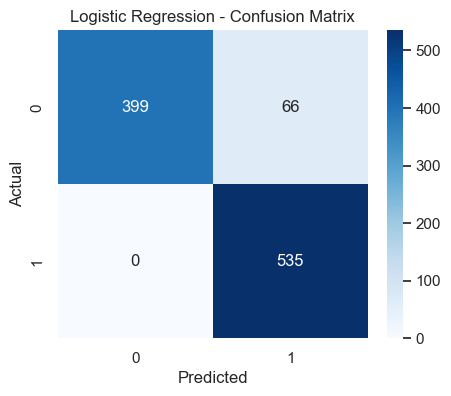

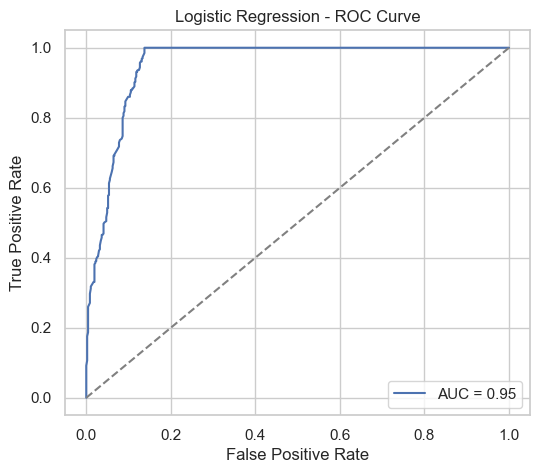

In [82]:
# Confusion Matrix
cm = confusion_matrix(y_test_lr, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_lr, y_prob_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test_lr, y_prob_lr):.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend()
plt.show()


In [83]:
# Check training performance
y_train_pred_lr = log_reg.predict(X_train_lr_scaled)
train_acc = accuracy_score(y_train_lr, y_train_pred_lr)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_lr, y_pred_lr):.4f}")

Train Accuracy: 0.9373
Test Accuracy: 0.9340


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
# Parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)

# Best model after tuning
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Metrics
rf_metrics = {
    'Model': 'Random Forest (Tuned)',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
}

print(rf_metrics)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best RF Params: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
{'Model': 'Random Forest (Tuned)', 'Accuracy': 0.988, 'Precision': 0.9780621572212066, 'Recall': 1.0, 'F1-score': 0.988909426987061, 'ROC-AUC': np.float64(0.9992885137172144)}


In [88]:
y_train_pred_rf = best_rf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Train Accuracy: 0.99725
Test Accuracy: 0.988


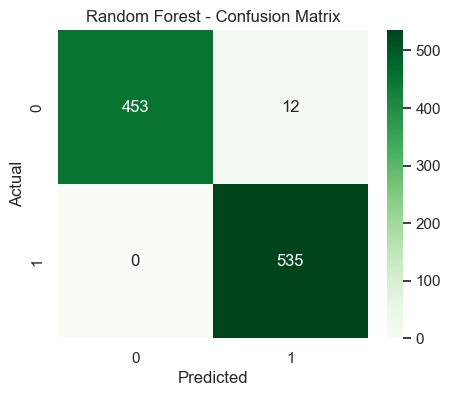

In [89]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


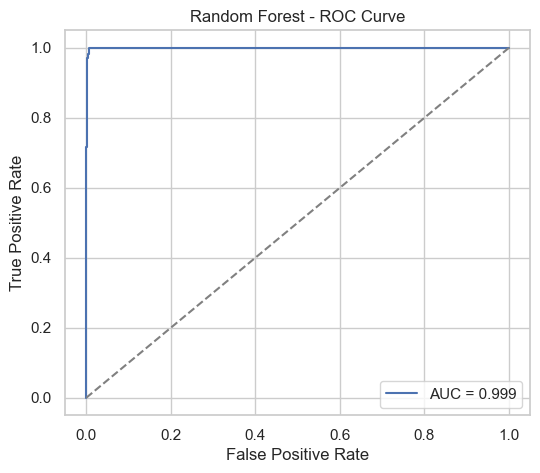

In [90]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_score(y_test, y_prob_rf):.3f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('Random Forest - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13896\117046204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')


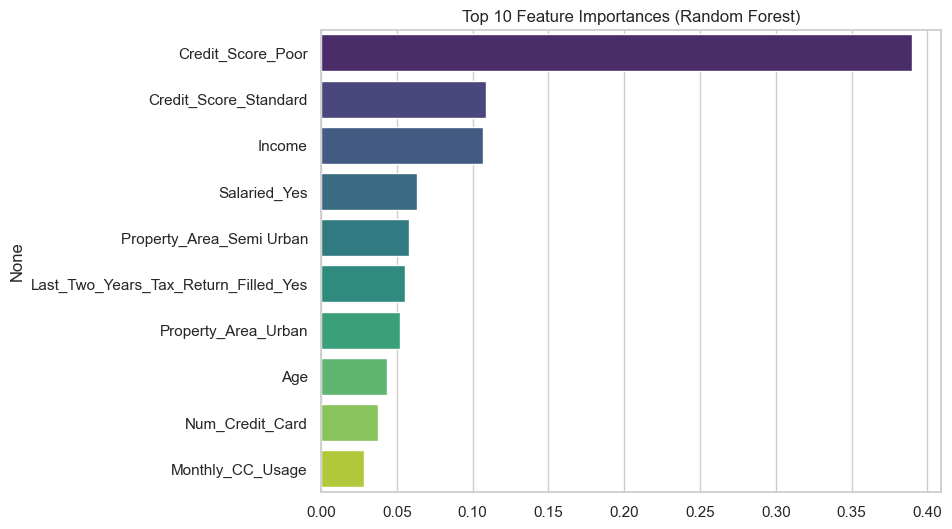

In [ ]:
# Feature importance
importances = best_rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
# Parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada = AdaBoostClassifier(random_state=42)

grid_ada = GridSearchCV(estimator=ada, param_grid=ada_params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_ada.fit(X_train, y_train)

print("Best AdaBoost Params:", grid_ada.best_params_)

# Best AdaBoost model
best_ada = grid_ada.best_estimator_

# Predictions
y_pred_ada = best_ada.predict(X_test)
y_prob_ada = best_ada.predict_proba(X_test)[:, 1]

# Metrics
ada_metrics = {
    'Model': 'AdaBoost',
    'Accuracy': accuracy_score(y_test, y_pred_ada),
    'Precision': precision_score(y_test, y_pred_ada),
    'Recall': recall_score(y_test, y_pred_ada),
    'F1-score': f1_score(y_test, y_pred_ada),
    'ROC-AUC': roc_auc_score(y_test, y_prob_ada)
}

print(ada_metrics)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 200}
{'Model': 'AdaBoost', 'Accuracy': 0.979, 'Precision': 0.9638989169675091, 'Recall': 0.9981308411214953, 'F1-score': 0.9807162534435262, 'ROC-AUC': np.float64(0.9978755903929253)}


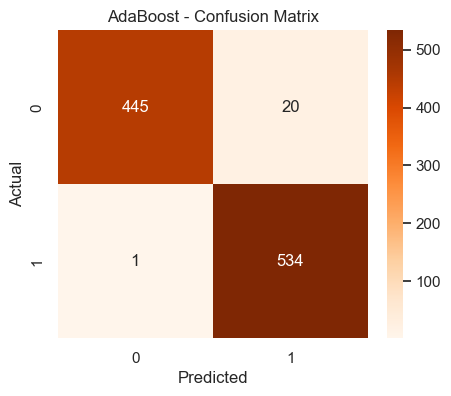

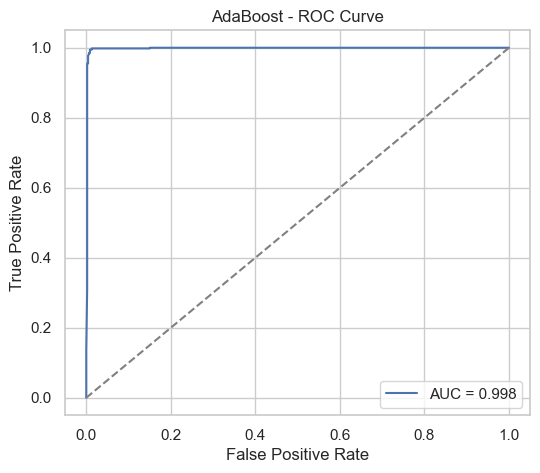

In [97]:
# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(5,4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges')
plt.title('AdaBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
plt.figure(figsize=(6,5))
plt.plot(fpr_ada, tpr_ada, label=f'AUC = {roc_auc_score(y_test, y_prob_ada):.3f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('AdaBoost - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [94]:
from xgboost import XGBClassifier

In [95]:
# Train XGBoost with basic tuning
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Parameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)

# Best XGBoost model
best_xgb = grid_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_prob_xgb)
}

print(xgb_metrics)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best XGBoost Params: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
{'Model': 'XGBoost', 'Accuracy': 0.998, 'Precision': 0.9962756052141527, 'Recall': 1.0, 'F1-score': 0.9981343283582089, 'ROC-AUC': np.float64(0.9985689880414029)}


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


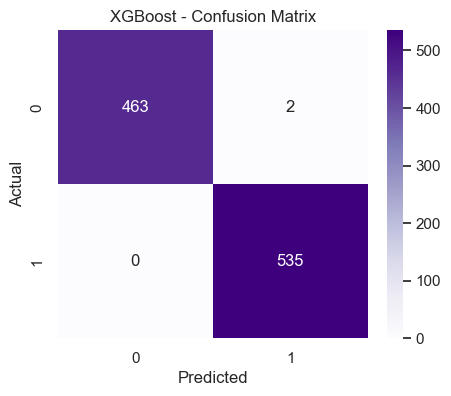

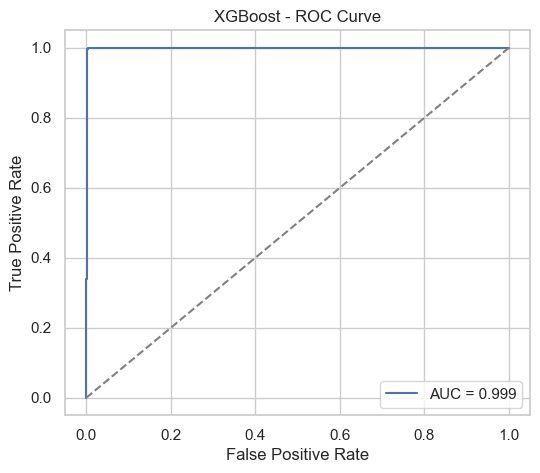

In [98]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples')
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {roc_auc_score(y_test, y_prob_xgb):.3f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('XGBoost - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


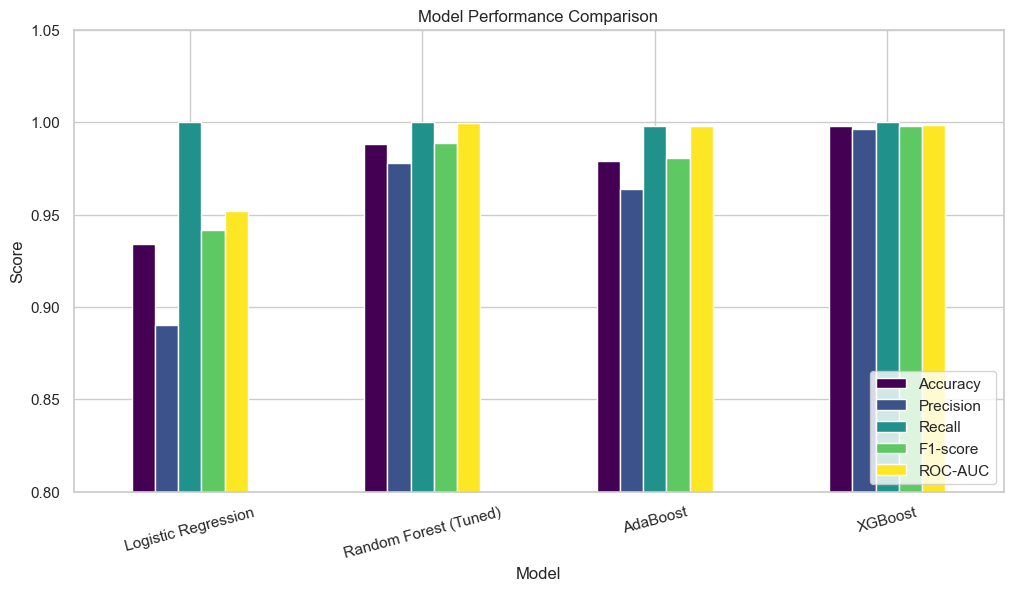

In [96]:
# Combine metrics into a DataFrame
results_df = pd.DataFrame([
    lr_metrics,
    rf_metrics,
    ada_metrics,
    xgb_metrics
])

# Plot comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.8, 1.05)
plt.legend(loc='lower right')
plt.xticks(rotation=15)
plt.show()

In [99]:
import joblib

# Save the best model
joblib.dump(best_xgb, 'best_loan_approval_model.pkl')
print("Best model (XGBoost) saved as best_loan_approval_model.pkl")

Best model (XGBoost) saved as best_loan_approval_model.pkl


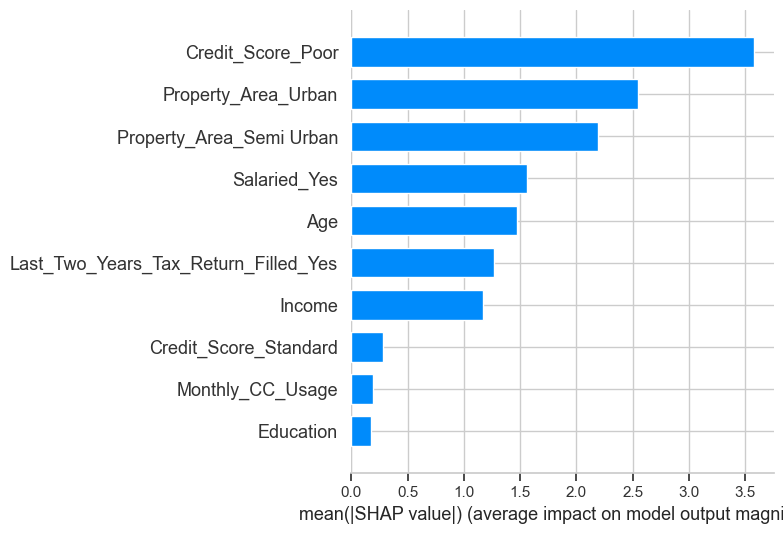

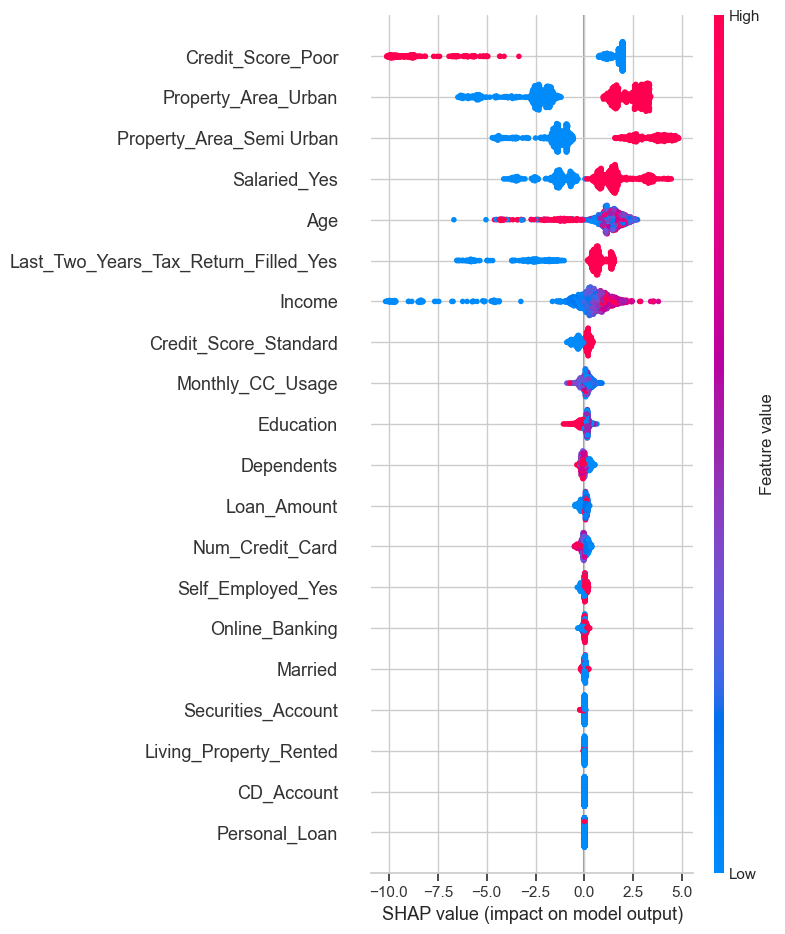

In [100]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)

# Detailed feature impact plot
shap.summary_plot(shap_values, X_test)